# Aula 1 Reconhecendo o Problema

### Preparação do Ambiente


In [3]:
import matplotlib.pyplot as plt
import cv2
import seaborn
import dlib

In [4]:
cv2.__version__

'4.7.0'

### Abrindo Uma imagem com Opencv e Matplotlib

In [5]:
img = cv2.imread("./classificacao_de_faces/px-girl.jpg")

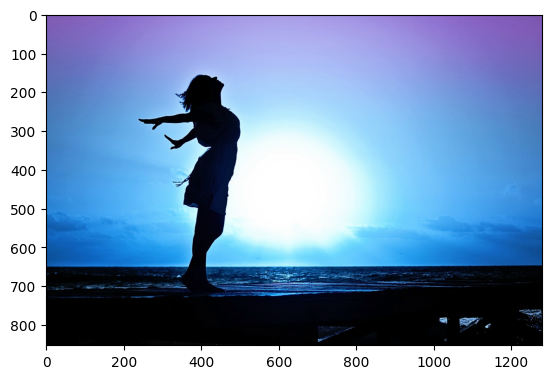

In [6]:
plt.imshow(img)

A imagem esta em BGR, precisamos arrumar a coloração da imagem

In [7]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

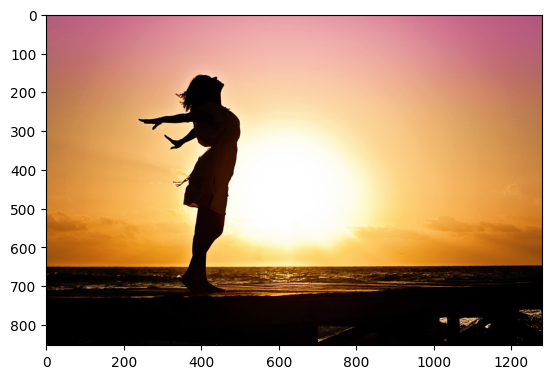

In [8]:
plt.imshow(img_rgb)

Ao analisarmos essa imagem percebemos que a imagem tem 3 dimensões

In [9]:
img_rgb.shape

(853, 1280, 3)

Quando fazemos a conversão para cinza essa imagem deixa de possuir 3 dimensões pois só possui a escala de cinza

In [10]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

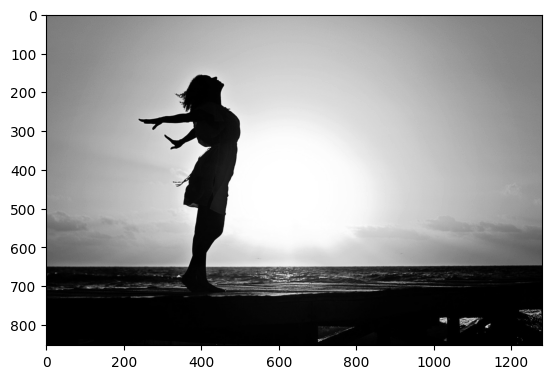

In [11]:
plt.imshow(img_gray, cmap = "gray")

In [12]:
img_gray.shape

(853, 1280)

Diferente da outra existe apenas uma unica dimensão

### Definindo uma regia de interesse Manualmente

In [13]:
img = cv2.imread("./classificacao_de_faces/px-people.jpg")

In [14]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

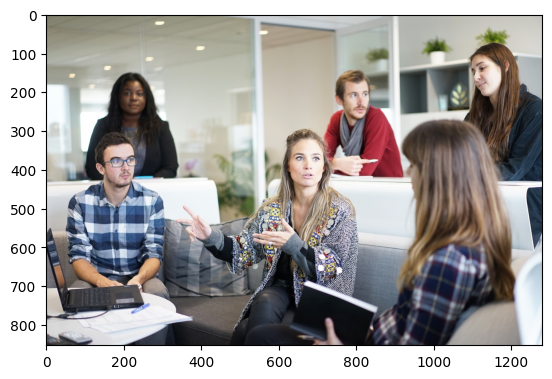

In [15]:
plt.imshow(img)

Para obter uma região de interesse na imagem basta fazermos um slicing

In [16]:
img_sliced = img[80:220,1075:1200]

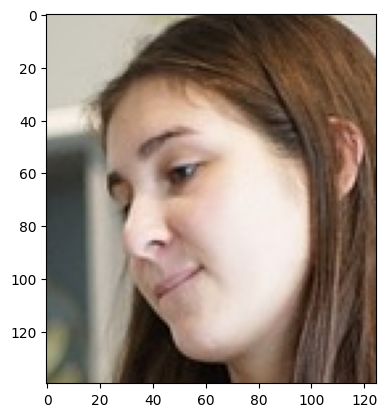

In [17]:
plt.imshow(img_sliced)

E com isso podemos fazer o processamento devido, toda imagem quando necessitamos de uma parte podemos foca-las utilizando o slicing

# Aula 2 Segmentação de faces

### Classificador de cascata Haar

In [18]:
img = cv2.imread("./classificacao_de_faces/px-people.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

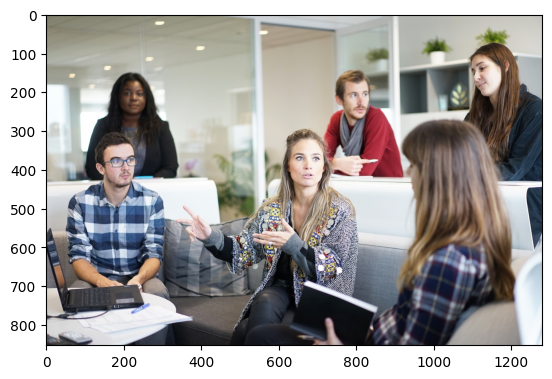

In [19]:
plt.imshow(img)

In [20]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

Para podermos encontrar faces automaticamente vamos utilizar um classificador. O classificador utilizado pode ser encontrado [aqui](https://github.com/opencv/opencv/tree/master/data/haarcascades)

In [21]:
classificador = cv2.CascadeClassifier("./classificacao_de_faces/haarcascade_frontalface_default.xml")

In [22]:
faces = classificador.detectMultiScale(img_gray, 1.3, 5)

In [23]:
len(faces)

5

No caso foram encontradas 5 possiveis faces, o que bate exatamente com a quantidade de faces na foto

### Extraindo ROI

Com as faces ja pre-detectadas podemos fazer os bounding box na imagem

In [26]:
img_box = img.copy()

In [27]:
for (x, y, w, h) in faces:
    cv2.rectangle(img_box, (x, y), (x+w, y+h), (255, 255, 0), 2)

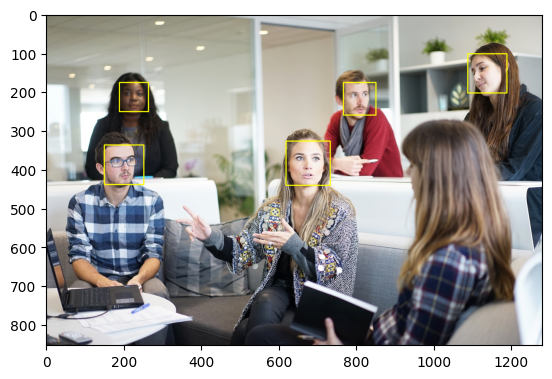

In [28]:
plt.imshow(img_box)

Podemos tambem extrair essas faces para algum arquivo

In [ ]:
for i, face in enumerate(faces):
    x, y, w, h = face
    img_roi = img[y:y+h, x:x+w]
    img_roi = cv2.cvtColor(img_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f"./classificacao_de_faces/roi_{i}.jpg", img_roi)
